# **AP155 Lab Assignment**
## Module 6: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Manalo Jr., Darwin\
_Student No._:\
_Section_:THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: Nov. 12, 2024

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Darwin P. Manalo Jr.**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1

**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(25 pts.)*

2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(25 pts.)*

3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(25 pts.)*

4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(25 pts.)*

# **Change in Total Magnetization**
The total magnetization is given by $$M=\sum_{ij} s_{ij}$$\
Flipping the spin at $[m,n]:s_{mn}=s_{mn} * (-1)$ $$\Delta M=M_{new}-M_{old}=-2s_{mn}$$\
Thus, the total magnetization of the new state is $$M_{new}=\Delta M+M_{old}$$so, instead of calculating the summation for each state, we can just calculate the change in total magnetization and add it to the previous state.\
# Change in total energy
Let $s_{ij}$ be the spin of the dipole at the i-th row and j-th column. Each dipole has a spin of either +1 or -1 $$s_{ij}\in \{+1,-1\}$$
Let [m,n] be the position of the dipole that we want to flip. Flipping the spin at $$[m,n]:s_{mn, new}=s_{mn}*(-1)$$ so the change in energy is given by $$\Delta E=E_{new}-E_{old}=-J(-2s_{mn}s_{m-1,n}-2s_{mn}s_{m+1,n}-2s_{mn}s_{m,n-1}-2s_{mn}s_{m,n+1})$$ $$\Delta E=2Js_{mn}(s_{m-1,n}+s_{m+1,n}+s_{m,n-1}+s_{m,n+1})$$. Similarl to the total magnetization, we only need to calculate the change in Energy after the random spin change to obtain the total energy of the next state.$$E_{new}=E_{prev}+\Delta E$$ where this equation is implemented as the total energy in the function below.
# Acceptance Probability
The acceptance probability is given by
\begin{equation}
P_a=\begin{cases}
      1 & E_j\leq E_i \\
      e^{-\beta(E_j-E_i)} & E_j>E_i
   \end{cases}
\end{equation}
where $\beta$ is the thermodynamic beta while $E_j$ and $E_i$ is the new and previous state, respectively.
$$P_a= \begin{cases}
      1 & \Delta E\leq 0 \\
      e^{-\beta(\Delta E)}& \Delta E
   \end{cases}
$$


In [6]:
import numpy as np                     # Used for numerical calculations especially for arrays and random number generators
import matplotlib.pyplot as plt        # Used for plotting the data/results
from math import exp                   # Used for computing the exponential function
from random import random, randint     # Used for generating random numbers

# Defining constants
L = 20      # size of the square lattice spin system
k_B = 1     # Boltzmann constant
N = 1000000 # Number of Monte Carlo steps
# Defining a function for generating a new Ising Model state based on a given seed for the random number generator.
# Inputs: 'L' is the size of the square lattice Ising Model we want to generate
#         'rng_seed' is an integer specifying the seed for the default_rng Generator. Default value is 666
# Output: an L by L matrix with elements randomly set to either +1 or -1
def new_state(L, rng_seed): # Geberates a new random state for the Ising model system of a 2D square lattice of spins
  # Construct a new Random Generator (numpy) using the specified seed
  rng = np.random.default_rng(rng_seed)     # Ensures the random number generators starts from the same state for reproducibility of results
  return rng.choice([-1, 1], size=(L,L))    # Generates an L by L array with elements randomly set to either -1 or +1

# Function calculating the Total Energy of the spin system
# Input:
# Output:
def Total_E(arr, J):
  L = arr[0].size
  sum = 0
  for i in range(L-1):
    sum += arr[i,:] @ arr[i+1,:] + arr[:,i] @ arr[:,i+1]    # dot product of adjacent rows and adjacent columns
  return -J * sum # The energy is proportional to the negative interaction constant "J" since its ferromagnetic interaction
#Defining a function for calculating the difference in total energy after a spin flip
# Inputs:
# Outputs:
def Energy_difference(arr, J, L, m, n):
  E_change = 0 # Calculates how the energy of the system changes based on the neighbors of the spin being flipped

  if m > 0:
    E_change += arr[m-1, n]
  if m < L-1:
    E_change += arr[m+1, n]
  if n > 0:
    E_change += arr[m, n-1]
  if n < L-1:
    E_change += arr[m, n+1]

  E_change *= 2 * J * arr[m, n] # This accounts for flipping a spin changes the sign of its contribution to energy
  return E_change

# Markov Chain Monte Carlo Implemntation for the Ising Model
# Inputs:
# Returns:
def MCMC(spins, J, T, N, rng_seed = 666):
  beta = 1/(k_B * T)    # Calculate the thermodynamic beta where k_B is the Boltzmann constant and T as the temperature

  # Construct a new Random Generator (numpy) using the specified seed
  rng = np.random.default_rng(rng_seed)
  L = spins[0].size             # size of the square spin system
  total_E = Total_E(spins, J)   # Calculate the total Energy of the initial state
  total_M = np.sum(spins)       # Calculate the total Magnetization of the initial state

  M_list = [total_M]            # Store the total magnetization per each step in a list

  # Repeat the Monte Carlo step multiple times
  for _ in range(N):
    # Choose a random position for the spin flip
    m, n = rng.integers(L), rng.integers(L)

    # Calculate change in total Energy of the new state
    dE = Energy_difference(spins, J, L, m, n)

    # Check whether to accept the flip
    if (dE <= 0) or (rng.random() <= exp(-beta*dE)): # Metropolis criterion: If the energy decreases, the flip is always accepted. If the energy increases, the flip is accepted with a probability of exp(-beta*dE)
      spins[m, n] *= -1            # Apply the flip change
      total_M += 2 * spins[m, n]   # Update the total magnetization
      total_E += dE                # Update the total Energy

    M_list.append(total_M)   # Add the total Magnetization of the new state to the list
  return spins, M_list       # Returns the final state of the lattice (spins) and the list of magnetization values over time

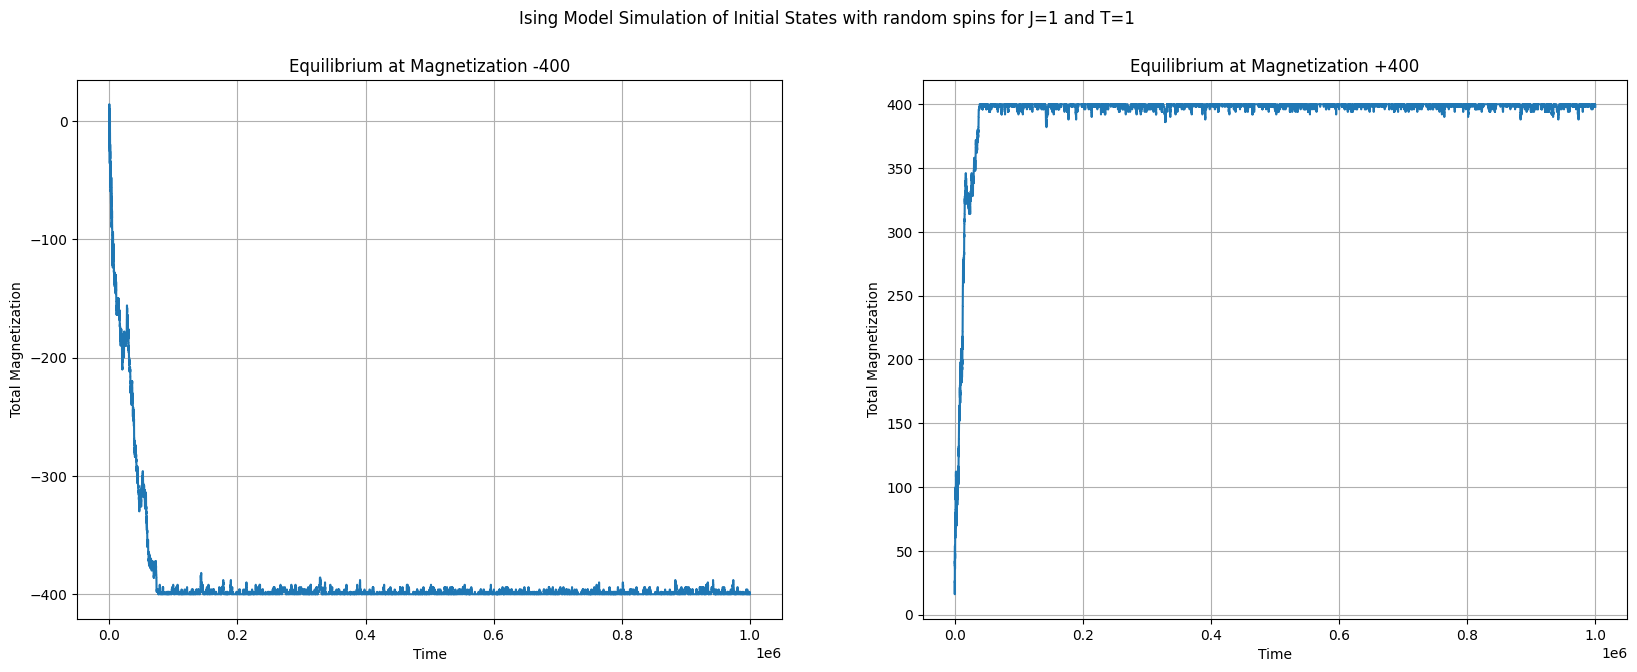

In [13]:
plt.figure(figsize=(20,7))
plt.suptitle("Ising Model Simulation of Initial States with random spins for J=1 and T=1")

# Plot 1: Equilibrium at -400 Magnetization
spin_init = new_state(L, 724)
spin_final, M_list = MCMC(spin_init, 1, 1, N)
plt.subplot(1,2,1)
plt.title(f"Equilibrium at Magnetization -400")
plt.xlabel("Time")
plt.ylabel("Total Magnetization")
plt.plot(M_list)
plt.grid()
# Plot 2: Equilibrium at +400 Magnetization
spin_init = new_state(L, 725)
spin_final, M_list = MCMC(spin_init, 1, 1, N)
plt.subplot(1,2,2)
plt.title(f"Equilibrium at Magnetization +400")
plt.xlabel("Time")
plt.ylabel("Total Magnetization")
plt.plot(M_list)
plt.grid()

plt.show()

# Initial state of uniform spin (all spin up)$$J=1$$ and $$T=1$$


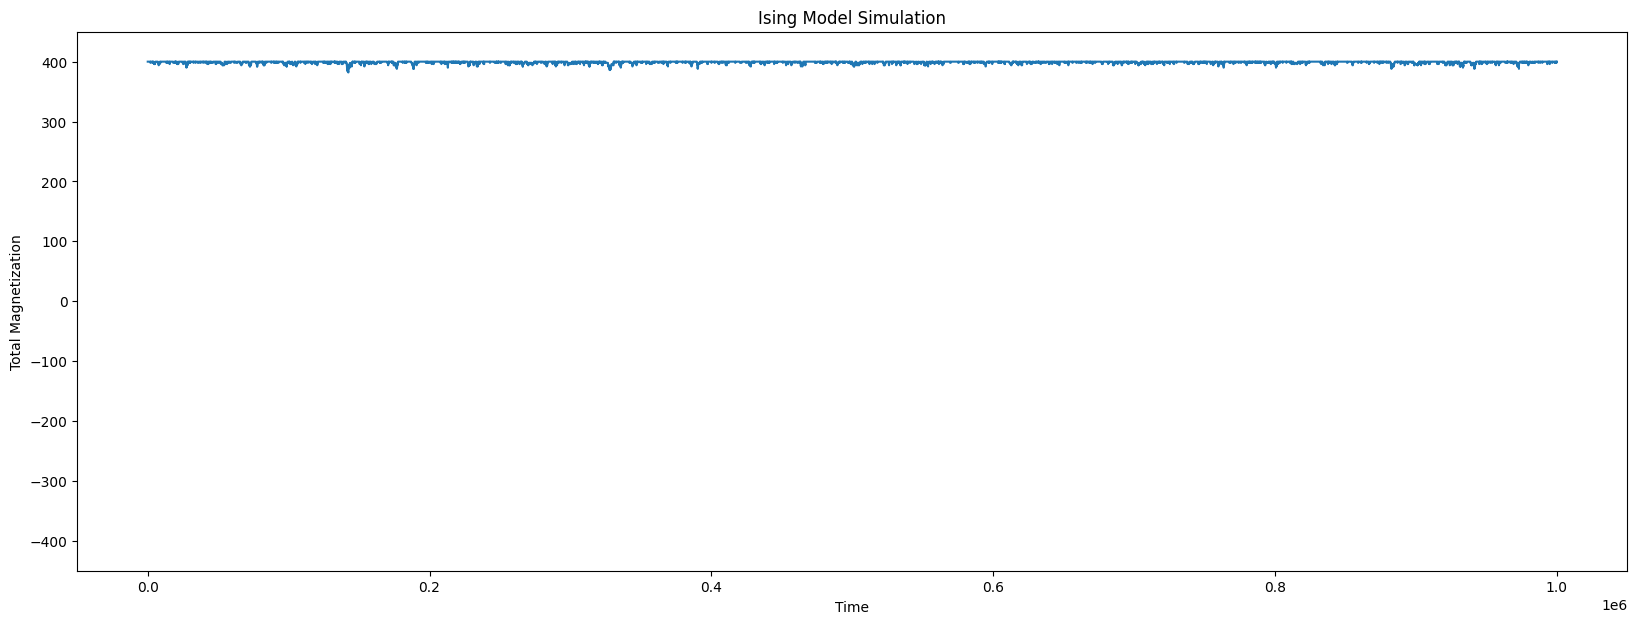

In [2]:
# Generate an initial state with all spin up
spin_init = np.ones((L,L))

# Run MCMC method with J = 1, T = 1, 1000000 steps, and RNG seed = 666
spin_final, M_data = MCMC(spin_init, 1, 1, N)

plt.figure(figsize=(20,7))
plt.title(f"Ising Model Simulation with initial state of all spin up ")
plt.xlabel("Time")
plt.ylabel("Total Magnetization")
plt.plot(M_data)
plt.ylim(-450, 450)
plt.show()

# Varying the temperature (T) of the system with random and uniform initial states


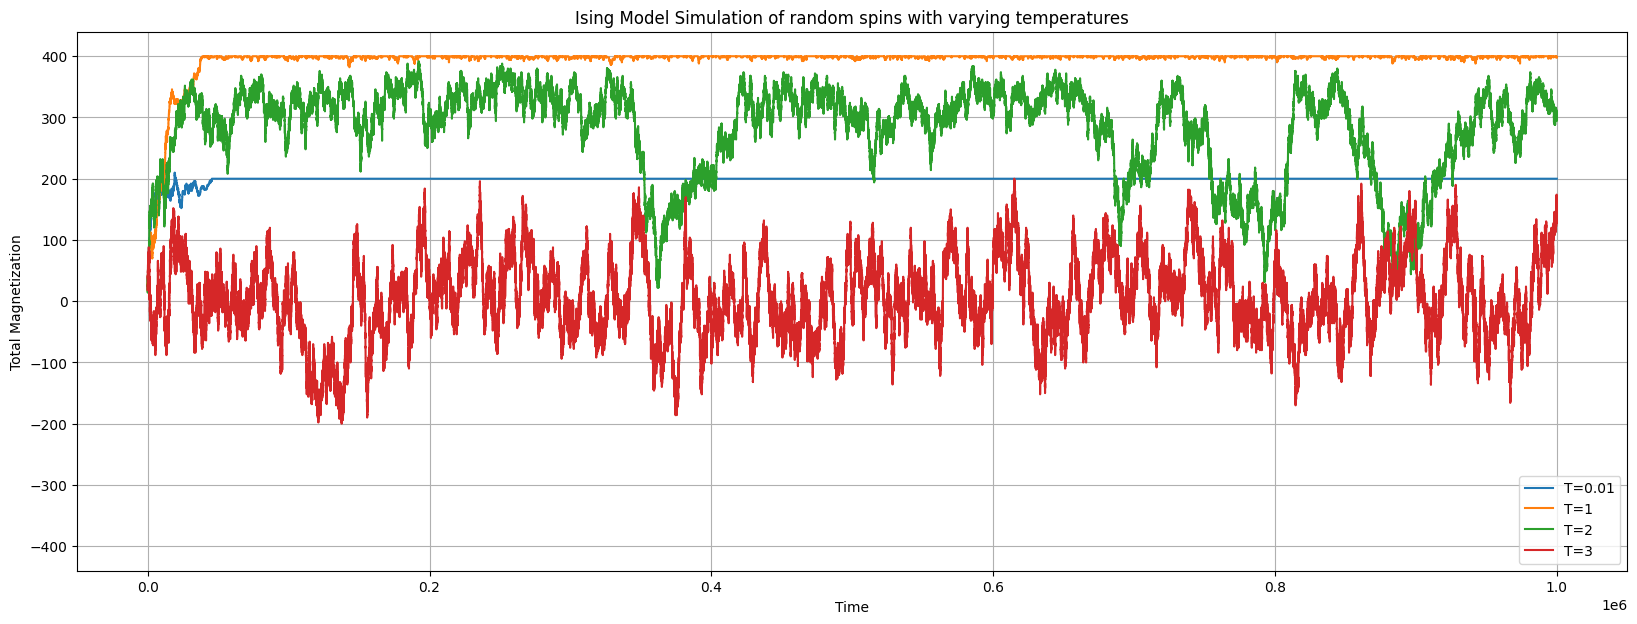

In [19]:

plt.figure(figsize=(20,7))
plt.title("Ising Model Simulation of random spins with varying temperatures")
plt.xlabel("Time")
plt.ylabel("Total Magnetization")

# T = 0.1
spin_init = new_state(L, 725)
spin_final, M_list = MCMC(spin_init, 1, 0.01, N)
plt.plot(M_list)
# T = 1
spin_init = new_state(L, 725)
spin_final, M_list = MCMC(spin_init, 1, 1, N)
plt.plot(M_list)
# T = 2
spin_init = new_state(L, 725)
spin_final, M_list = MCMC(spin_init, 1, 2, N)
plt.plot(M_list)
# T = 3
spin_init = new_state(L, 725)
spin_final, M_list = MCMC(spin_init, 1, 3, N)
plt.plot(M_list)

plt.ylim(-440, 440)
plt.legend([f"T=0.01", f"T=1", f"T=2", f"T=3"], loc="lower right")
plt.grid()
plt.show()

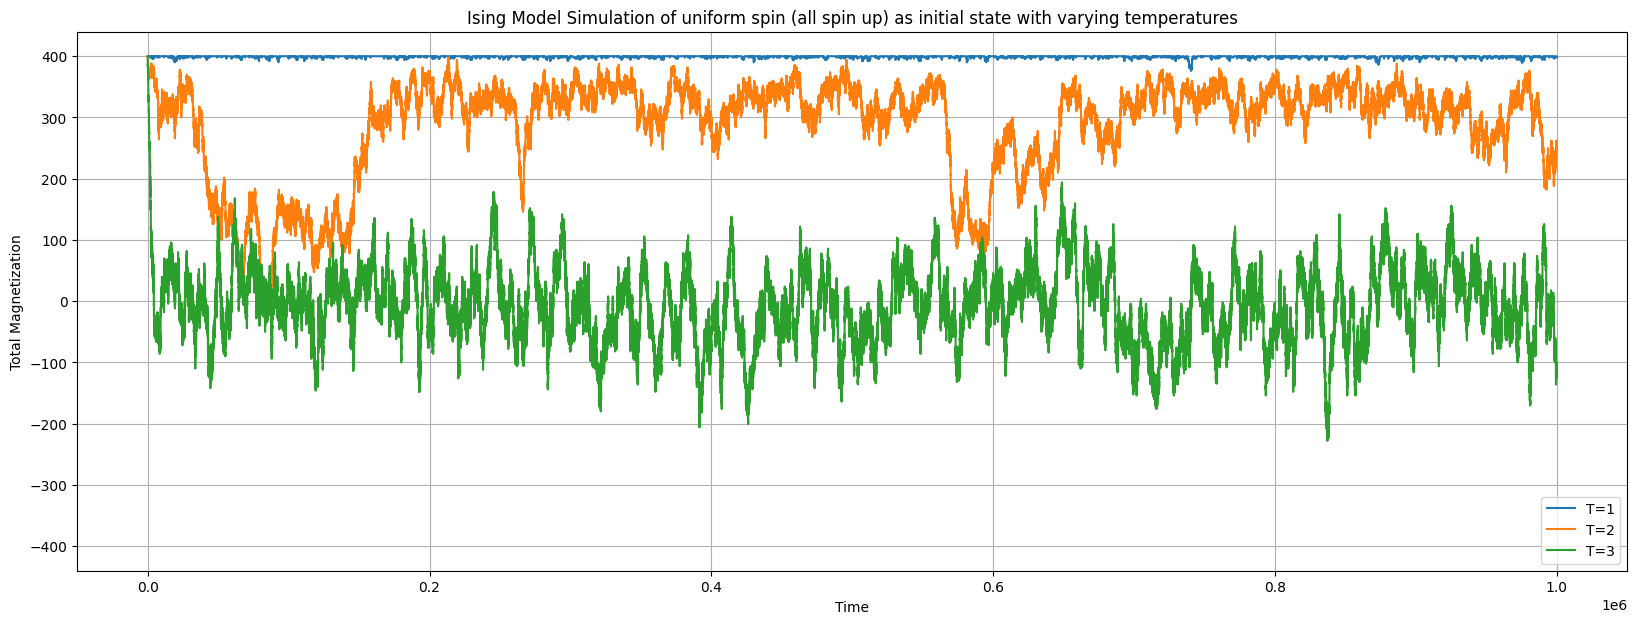

In [22]:
plt.figure(figsize=(20,7))
plt.title("Ising Model Simulation of uniform spin (all spin up) as initial state with varying temperatures")
plt.xlabel("Time")
plt.ylabel("Total Magnetization")

# T = 1
spin_init = np.ones((L, L))
spin_final, M_list = MCMC(spin_init, 1, 1, N, 200)
plt.plot(M_list)
# T = 2
spin_init = np.ones((L, L))
spin_final, M_list = MCMC(spin_init, 1, 2, N, 300)
plt.plot(M_list)
# T = 3
spin_init = np.ones((L, L))
spin_final, M_list = MCMC(spin_init, 1, 3, N, 400)
plt.plot(M_list)

plt.ylim(-440, 440)
plt.legend([f"T=1", f"T=2", f"T=3"], loc="lower right")
plt.grid()
plt.show()

# Varying interaction constant (J) of the system


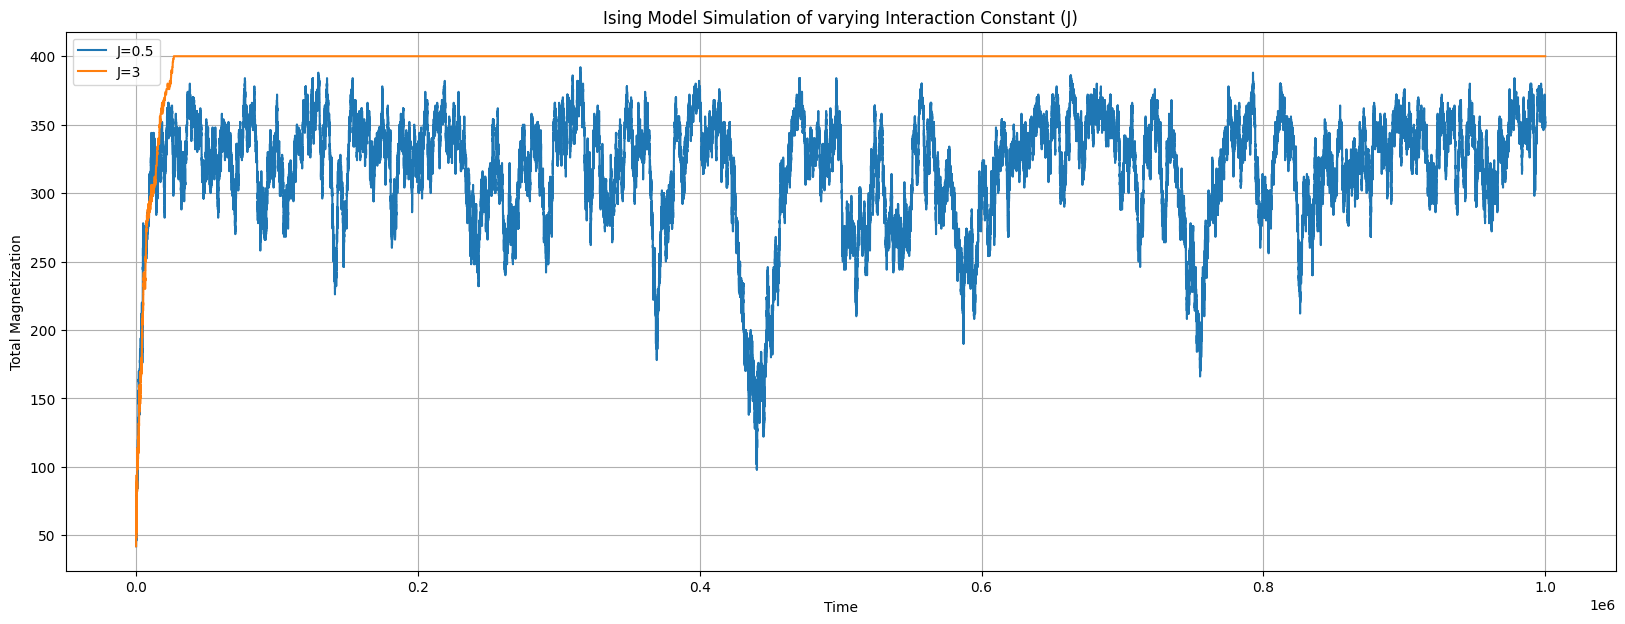

In [24]:
plt.figure(figsize=(20,7))
plt.title(f"Ising Model Simulation of varying Interaction Constant (J)")
plt.xlabel("Time")
plt.ylabel("Total Magnetization")

# J = 0.5
spin_init = new_state(L, 100)
spin_final, M_data = MCMC(spin_init, 0.5, 1, 1000000)
plt.plot(M_data)
# J = 3
spin_init = new_state(L, 100)
spin_final, M_data = MCMC(spin_init, 3, 1, 1000000)
plt.plot(M_data)

plt.legend([f"J=0.5", f"J=3"])
plt.grid()
plt.show()

# Discussion of the Results

The results show the thermodynamic behavior of the Ising model with ferromagnetic interaction (spins tend to align in the same direction) using Markov Chain Monte Carlo Simulation on a 20 x 20 square lattice (2D) system with interaction constant (J), Boltzmann constant (k_B), and temperature (T) set to 1. As we can see from the 1st plot, the system achieved a thermal equilibrium (after some time) with total magnetization of $\pm 400$ (highly magnetized since the spins are aligned in positive "up" direction and negative "down" direction). This code allows the simulation of the Ising model at different temperatures and the study of **phase transitions** where the system goes from a disordered (high temperature) state to an ordered (low temperature) state.

**Dependence of Magnetization and Energy to the initial conditions**\
The results above is possible since we initially set the spins randomly to $\pm 1$ leading the system to evolve towards an equilibrium state over time based on the changes of energy. The total magnetization and energy distribution might vary depending on the random state generated from the start but at equilibrium, these fluctuations should decrease as the system reaches **thermalization** where the system ''forgets'' its initial conditions after several Monte Carlo steps. However, if we change the initial conditions to "uniform spins" where all spins start in the same direction (either all up or all down but I only tried all up), the system will quickly evolve to lower energy distribution so the system will start in an ordered state which has a high magnetization (non-zero) as shown in the 2nd plot (all up uniform spin). In this case, the system will achieve equilibrium faster since it requires fewer steps to approach equilibrium than if we start at a randomize spin since it has a more complex configuration so it requires more Monte Carlo steps. Although, if the temperature is high enough, the system may explore other configurations and may return to a more disordered state as shown in the 4th plot. Hence, changing the initial conditions will only affect how quickly the system reaches equilibrium but it will still achieve an equilibrium state where the spontaneous magnetization happens regardless of the starting configuration due to ferromagnetic interaction.

**Varying Temperature**\
-At low temperatures (T$\leq2$), the system tends to stay in the configuration with the lowest energy (all spins up or down). As we can see from the 3rd and 4th plot, random and uniform initial states, where $T=2$ and $T=0.01$, the system exhibits alignment of the spin and achieve thermal equilibrium with the nonzero magnetization describing a spontaneous magnetization.
- *Random state* : Since the system started with a random $\pm 1$ spin, the system will eventually achieved thermal equilibrium over some time as shown in the 3rd plot.
- *All spins up or down* : These initial conditions (all up or all down) will achieve equilibrium relatively faster and remain stable (aligned spins) for a long time (making it look trapped) since flipping a spin in this ordered state will be difficult since it's already a favorable state.

-At high temperatures (T→$\infty$), thermal fluctuations dominate, and the system will explore all possible configurations with total magnetization being zero (on average) as shown in the high temperatures on the 3rd and 4th plot where $T=3$. The initial conditions will have a little on the results because the system will be in a highly disordered state.

**Varying the interaction constant (J)**\
Looking at the equation for the total energy of the system given above, the value of J dictates the strength of the interaction between neighboring spins in the 2D square lattice. Let's look at different values of the interaction constant.
- For a high interaction constant ($J>1$), the system has a strong interaction between the neighboring spins leading to high magnetization resulting into a more **ordered** state as described by the smoother (less fluctuations) plot in the 5th plot for $J=3$ compared to the 1st plot.
- For $J\rightarrow 0$, the system is still ferromagnetic so it will still have the alignment of spins but thermal fluctuations especially in high temperature may cause some disorder. Moreover, as the interaction between the neighboring spins weaken, the system's behavior will be more random resulting to a highly disordered state.
- For $J<0$, we have an antiferromagnetic interaction where the neighboring spins tend to anti-align meaning one spin prefers to be +1 while the other is -1 and vice versa.